In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Data preprocessing: normalization
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Loading the dataset
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Printing the shape of the datasets
print(f'Training data: {len(train_dataset)} samples')
print(f'Testing data: {len(test_dataset)} samples')


100%|██████████| 26421880/26421880 [00:03<00:00, 7740550.32it/s] 


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 254799.57it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4638570.64it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 10277142.79it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Training data: 60000 samples
Testing data: 10000 samples


In [9]:

image, label = train_dataset[3]  # Replace 'random_index' with an actual integer index
print(image, label)

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -0.7412, -0.2471,  0.3725,  0.2235, -0.4980, -0.8902,
          -0.5765,  0.0745,  0.6000,  0.5216, -0.2000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.4275,
           0.4588,  0.3882,  0.4353,  0.3725,  0.4745,  0.8196,  1.0000,
           0.7490,  0.7176,  0.5216,  0.4039,  0.4588,  0.6706,  0.1451,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.7255,  0.2784,
           0.0980,  0.1765,  0.1922,  0.1765,  0.1451,  0.3725,  0.3725,
           0.3569,  0.3412,  0.2235,  0.1922,  0.1608,  0.0118,  0.2235,
           0.0980, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000,  0.1765,  0.1137,
           0.0980,  0.1922,  0.2549,  0.2235,  0

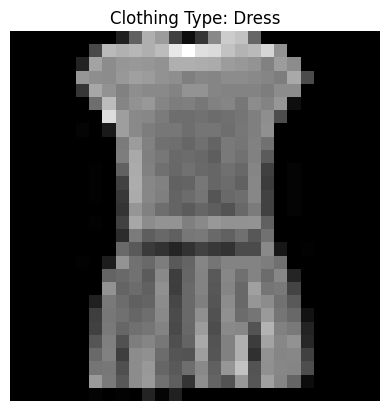

In [11]:
# Transform image back to a format suitable for display
image = image.squeeze(0)  

# Get clothing type based on label
clothing_types = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
clothing_type = clothing_types[label]

# Plot the image with label
plt.imshow(image, cmap='gray')
plt.title(f"Clothing Type: {clothing_type}")
plt.axis('off')
plt.show()

In [5]:
class CNN(nn.Module): #The CNN class inherits from nn.Module and defines the architecture of the neural network.
    def __init__(self):
        # we'll build 1 conv layer with max pooling
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)  # 1 input channel, 32 output channels, 3x3 kernel
        self.pool = nn.MaxPool2d(2, 2)  # 2x2 pooling
        self.fc1 = nn.Linear(13*13*32, 100)  # Flattened dimensions after pooling
        self.fc2 = nn.Linear(100, 10)  # 10 classes for FashionMNIST
#The forward method defines the forward pass of the network, specifying how input data flows through the layers
    def forward(self, x):
        x = self.conv1(x)
        x = nn.ReLU()(x)
        x = self.pool(x)
        x = x.view(-1, 13*13*32)  # Flatten
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.fc2(x)
        return nn.Softmax(dim=1)(x)

model = CNN()

In [6]:
# Setting up the loss and optimizer
#The loss function is defined using nn.CrossEntropyLoss(), which is suitable for multi-class classification tasks.
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model for 10 epochs
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader: #The training data is iterated over in batches using a data loader (train_loader).

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

Epoch 1/10, Loss: 1.7287398681640624
Epoch 2/10, Loss: 1.6681228606541951
Epoch 3/10, Loss: 1.6129674882888794
Epoch 4/10, Loss: 1.5715553172429402
Epoch 5/10, Loss: 1.559471510887146
Epoch 6/10, Loss: 1.553053243192037
Epoch 7/10, Loss: 1.5483681617736818
Epoch 8/10, Loss: 1.5442821836471559
Epoch 9/10, Loss: 1.540566241900126
Epoch 10/10, Loss: 1.5361587794621785


In [8]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Model accuracy on test set: {accuracy}%")

Model accuracy on test set: 90.08%


## Saving The Model

In [ ]:

# Save the model (optional)
torch.save(model.state_dict(), 'fashion_mnist_cnn.pt')

In [ ]:
# Load the saved model
model = FashionCNN()  # Create a new model instance
model.load_state_dict(torch.load('fashion_mnist_cnn.pt'))
model.eval()  # Set the model to evaluation mode (optional)

# Flowers Data

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Define the device (GPU or CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define the data transforms
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Load the Flowers dataset
train_dataset = datasets.ImageFolder('flowers/train', data_transforms['train'])
val_dataset = datasets.ImageFolder('flowers/val', data_transforms['val'])

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)

# Define the CNN model
class FlowerCNN(nn.Module):
    def __init__(self):
        super(FlowerCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.max_pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256*56*56, 128)
        self.fc2 = nn.Linear(128, 5)  # 5 classes: daisy, dandelion, roses, sunflowers, tulips

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.max_pool(x)
        x = torch.relu(self.conv2(x))
        x = self.max_pool(x)
        x = torch.relu(self.conv3(x))
        x = self.max_pool(x)
        x = x.view(-1, 256*56*56)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, optimizer, and loss function
model = FlowerCNN()
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
for epoch in range(10):
    model.train()
    for batch_idx, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(f'Epoch {epoch+1}, Batch {batch_idx+1}, Loss: {loss.item()}')

    model.eval()
    val_loss = 0
    correct = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()

    accuracy = correct / len(val_loader.dataset)
    print(f'Epoch {epoch+1}, Val Loss: {val_loss / len(val_loader)}, Val Acc: {accuracy:.2f}%')